<img src="https://imgur.com/3Ua9VYU.png" style="float: left; margin: 18px; height: 75px"> 

## *Exploratory Data Analysis & Data Visualization*
---

## Import Libraries
---

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Reading in Data
---

In [186]:
bbandpl=pd.read_csv('../dataset/bbandpl.csv')
bbandpl.head()

,subreddit,body
0,bodybuilding,Lmao so classic is basically open now
1,bodybuilding,No one had a coach up until late 90s. Seems li...
2,bodybuilding,Let’s all agree with enough and some. 1st plac...
3,bodybuilding,58 now 59 at Christmas
4,bodybuilding,Where is the cheapest iso100 fruity pebbles? I...


## Exploring Data
---

In [96]:
bbandpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  2000 non-null   object
 1   body       2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [97]:
#check for shape of dataframe
bbandpl.shape

(2000, 2)

In [99]:
#check for NaN values
bbandpl.isna().sum()

subreddit    0
body         0
dtype: int64

In [187]:
#converting subreddits to binary values
#creating character count column
#creating word count column
bbandpl['subreddit']=bbandpl['subreddit'].map({'bodybuilding':1,'powerlifting':0})
bbandpl['comment_character_count']=bbandpl.body.str.len()
bbandpl['comment_word_count']=(bbandpl['body'].str.split()).str.len()
bbandpl

,subreddit,body,comment_character_count,comment_word_count
0,1,Lmao so classic is basically open now,37,7
1,1,No one had a coach up until late 90s. Seems li...,507,84
2,1,Let’s all agree with enough and some. 1st plac...,62,13
3,1,58 now 59 at Christmas,22,5
4,1,Where is the cheapest iso100 fruity pebbles? I...,67,12
...,...,...,...,...
1995,0,Eddie without a suit hasnt ever pulled over 46...,285,53
1996,0,I used it for a brief amount of time. I think ...,290,56
1997,0,"Go for it, especially if these sources are pee...",57,9
1998,0,Is anyone using JuggernautAI for powerlifting?...,284,48


In [101]:
#descriptive statistics
bbandpl.describe()

,subreddit,comment_character_count,comment_word_count
count,2000.000000,2000.000000,2000.000000
mean,0.500000,208.383000,37.839500
std,0.500125,429.348592,74.793374
min,0.000000,1.000000,1.000000
25%,0.000000,50.000000,9.000000
50%,0.500000,113.000000,21.000000
75%,1.000000,239.250000,44.000000
max,1.000000,9552.000000,1701.000000


## Data Visualizations
---

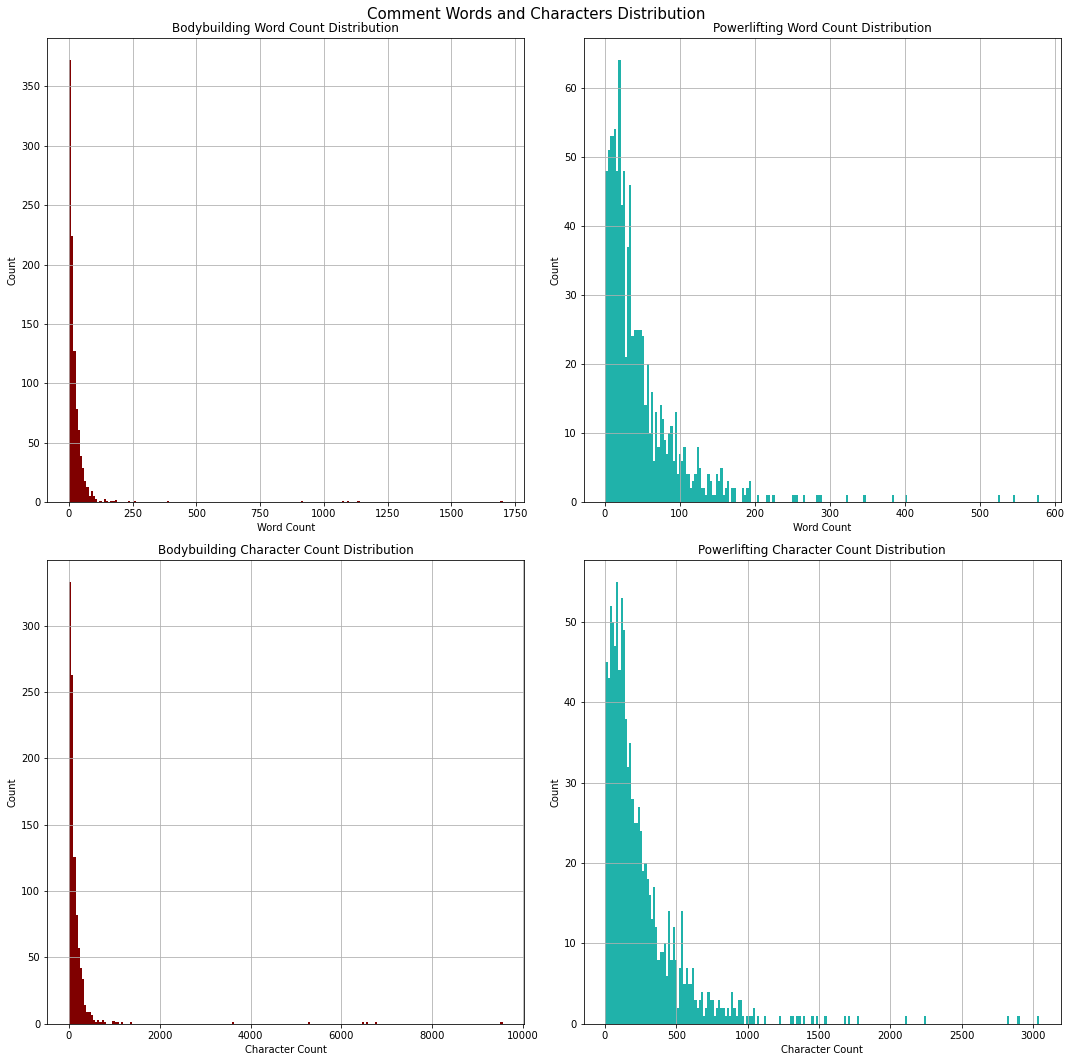

In [243]:
#creating histograms of the distribution of comment 

fig,axs=plt.subplots(2,2,figsize=(15,15))
fig.suptitle('Comment Words and Characters Distribution',fontsize=15)
bbandpl['comment_word_count'][bbandpl['subreddit']==1].hist(ax=axs[0][0],bins=200,alpha= 1,color='maroon')
bbandpl['comment_word_count'][bbandpl['subreddit']==0].hist(ax=axs[0][1],bins=200,alpha= 1,color='lightseagreen')
bbandpl['comment_character_count'][bbandpl['subreddit']==1].hist(ax=axs[1][0],bins=200,alpha= 1,color='maroon')
bbandpl['comment_character_count'][bbandpl['subreddit']==0].hist(ax=axs[1][1],bins=200,alpha= 1,color='lightseagreen')

axs[0][0].set(title='Bodybuilding Word Count Distribution',xlabel='Word Count',ylabel='Count')
axs[0][1].set(title='Powerlifting Word Count Distribution',xlabel='Word Count',ylabel='Count')

axs[1][0].set(title='Bodybuilding Character Count Distribution',xlabel='Character Count',ylabel='Count')
axs[1][1].set(title='Powerlifting Character Count Distribution',xlabel='Character Count',ylabel='Count')

plt.tight_layout()
plt.savefig('../data-visualizations/comment-words-and-characters-distribution-hist.jpg');

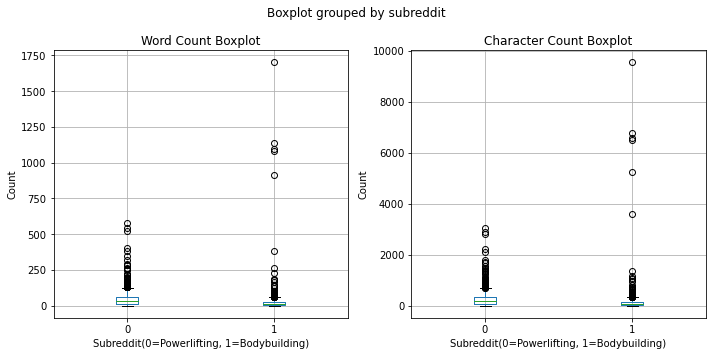

In [208]:
#creating boxplots of comment character counts and word counts for both subreddits

fig,(axs1,axs2)=plt.subplots(1,2,figsize=(10,5))
bbandpl.boxplot(ax=axs1,column='comment_word_count',by='subreddit')
bbandpl.boxplot(ax=axs2,column='comment_character_count',by='subreddit')
axs1.set(title='Word Count Boxplot',xlabel='Subreddit(0=Powerlifting, 1=Bodybuilding)',ylabel='Count')
axs2.set(title='Character Count Boxplot',xlabel='Subreddit(0=Powerlifting, 1=Bodybuilding)',ylabel='Count')

plt.tight_layout()
plt.savefig('../data-visualizations/comment-words-and-character-box.jpg');

## *CountVectorized EDA - Stop Words Removed*
---

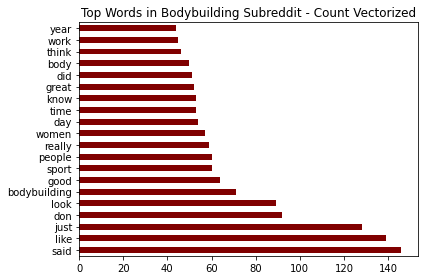

In [230]:
cvec=CountVectorizer(stop_words='english')
cvec.fit(bbandpl['body'][bbandpl['subreddit']==1])
bbandplvec=cvec.transform(bbandpl['body'][bbandpl['subreddit']==1])
bbandplvecdf= pd.DataFrame(bbandplvec.todense(),columns=cvec.get_feature_names())
bbandplvecdf.sum().sort_values(ascending=False).head(20).plot(kind='barh',color='maroon')
plt.title('Top Words in Bodybuilding Subreddit - Count Vectorized')

plt.tight_layout()
plt.savefig('../data-visualizations/top-bodybuilding-words-countvec.jpg');

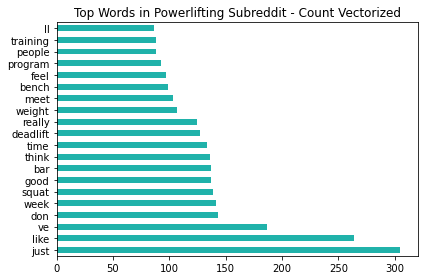

In [231]:
cvec=CountVectorizer(stop_words='english')
cvec.fit(bbandpl['body'][bbandpl['subreddit']==0])
bbandplvec=cvec.transform(bbandpl['body'][bbandpl['subreddit']==0])
bbandplvecdf= pd.DataFrame(bbandplvec.todense(),columns=cvec.get_feature_names())
bbandplvecdf.sum().sort_values(ascending=False).head(20).plot(kind='barh',color='lightseagreen')
plt.title('Top Words in Powerlifting Subreddit - Count Vectorized')

plt.tight_layout()
plt.savefig('../data-visualizations/top-powerlifting-words-countvec.jpg');

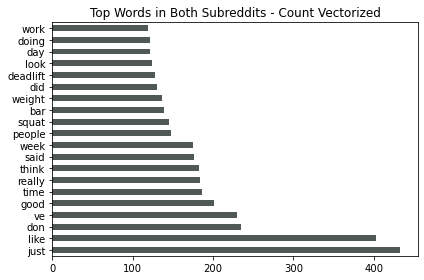

In [232]:
cvec=CountVectorizer(stop_words='english')
cvec.fit(bbandpl['body'])
bbandplvec=cvec.transform(bbandpl['body'])
bbandplvecdf= pd.DataFrame(bbandplvec.todense(),columns=cvec.get_feature_names())
bbandplvecdf.sum().sort_values(ascending=False).head(20).plot(kind='barh',color='#505955')
plt.title('Top Words in Both Subreddits - Count Vectorized')

plt.tight_layout()
plt.savefig('../data-visualizations/top-both-words-countvec.jpg');

## *TF-IDF Vectorized EDA - Stop Words Removed*
---

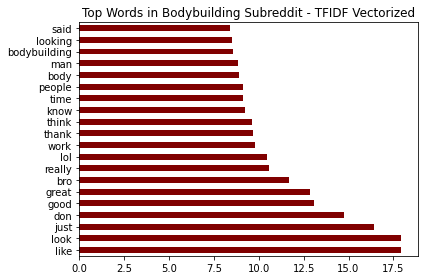

In [233]:
tvec=TfidfVectorizer(stop_words='english')
tvec.fit(bbandpl['body'][bbandpl['subreddit']==1])
bbandplvec=tvec.transform(bbandpl['body'][bbandpl['subreddit']==1])
bbandplvecdf= pd.DataFrame(bbandplvec.todense(),columns=tvec.get_feature_names())
bbandplvecdf.sum().sort_values(ascending=False).head(20).plot(kind='barh',color='maroon')
plt.title('Top Words in Bodybuilding Subreddit - TFIDF Vectorized')

plt.tight_layout()
plt.savefig('../data-visualizations/top-bodybuilding-words-tfidfvec.jpg');

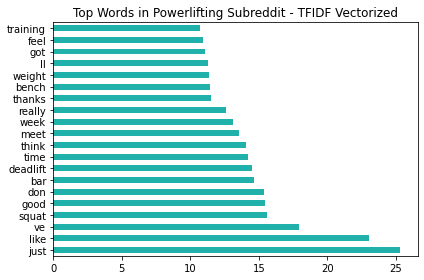

In [234]:
tvec=TfidfVectorizer(stop_words='english')
tvec.fit(bbandpl['body'][bbandpl['subreddit']==0])
bbandplvec=tvec.transform(bbandpl['body'][bbandpl['subreddit']==0])
bbandplvecdf= pd.DataFrame(bbandplvec.todense(),columns=tvec.get_feature_names())
bbandplvecdf.sum().sort_values(ascending=False).head(20).plot(kind='barh',color='lightseagreen')
plt.title('Top Words in Powerlifting Subreddit - TFIDF Vectorized')

plt.tight_layout()
plt.savefig('../data-visualizations/top-powerlifting-words-tfidfvec.jpg');

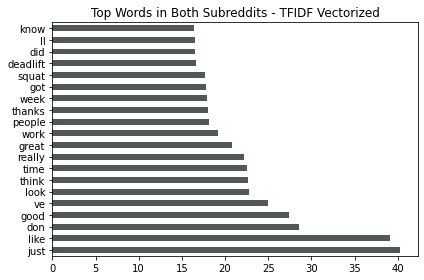

In [235]:
tvec=TfidfVectorizer(stop_words='english')
tvec.fit(bbandpl['body'])
bbandplvec=tvec.transform(bbandpl['body'])
bbandplvecdf= pd.DataFrame(bbandplvec.todense(),columns=tvec.get_feature_names())
bbandplvecdf.sum().sort_values(ascending=False).head(20).plot(kind='barh',color='#505955')
plt.title('Top Words in Both Subreddits - TFIDF Vectorized')

plt.tight_layout()
plt.savefig('../data-visualizations/top-both-words-tfidfvec.jpg');